<img src="./logo_UTN.svg" align="right" width="150" /> 
#### Procesamiento Digital de Señales

# Trabajo Práctico Nº0
#### Nombre y Apellido


# Por que imagenes cuadradas?
Jupyter Notebook es una herramienta para la confección de reportes técnicos, dado que permite la interacción en el mismo ambiente de: 
1. un procesador de texto elemental (formato Markdown) que permite resaltar texto, en forma de *itálica* o **negrita** de manera muy legible (haciendo doble click en este texto podrás ver el código fuente estilo Markdown). Cuenta con estilos predefinidos:

# Título 1
## Título 2
### Título 3

y también la capacidad de incluir enlaces a otras páginas, como por ejemplo [esta página](https://medium.com/ibm-data-science-experience/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed) donde encontrarás más funcionalidades del lenguaje **Markdown**

2. capacidad para incluir lenguaje matemático estilo LaTex, tanto de forma presentada

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \frac{ b_2 \, z^{-2} + b_1 \,  z^{-1} + b_0 }
{a_2 \, z^{-2} + a_1 \,  z^{-1} + a_0}
\end{equation}

como *inline* en el propio párrafo $y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $

3. La posibilidad de incluir scripts en Python, como los que usaremos para las simulaciones en los TPs de la materia. En este caso usaremos el *testbench0.py* como ejemplo. Una vez que lo probamos y estamos seguros que funciona de forma esperada en *Spyder*, podemos incluir los resultados de la simulación de manera casi transparente. Solo tenemos que agregar una celda de código donde incluimos el código, y los resultados directamente quedan incluidos en este documento.

In [19]:
from __future__ import print_function
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt


def rotatedRectWithMaxArea(w, h, angle):
  """
  Given a rectangle of size wxh that has been rotated by 'angle' (in
  radians), computes the width and height of the largest possible
  axis-aligned rectangle (maximal area) within the rotated rectangle.
  """
  if w <= 0 or h <= 0:
    return 0,0

  width_is_longer = w >= h
  side_long, side_short = (w,h) if width_is_longer else (h,w)

  # since the solutions for angle, -angle and 180-angle are all the same,
  # if suffices to look at the first quadrant and the absolute values of sin,cos:
  sin_a, cos_a = abs(math.sin(angle)), abs(math.cos(angle))
  if side_short <= 2.*sin_a*cos_a*side_long or abs(sin_a-cos_a) < 1e-10:
    # half constrained case: two crop corners touch the longer side,
    #   the other two corners are on the mid-line parallel to the longer line
    x = 0.5*side_short
    wr,hr = (x/sin_a,x/cos_a) if width_is_longer else (x/cos_a,x/sin_a)
  else:
    # fully constrained case: crop touches all 4 sides
    cos_2a = cos_a*cos_a - sin_a*sin_a
    wr,hr = (w*cos_a - h*sin_a)/cos_2a, (h*cos_a - w*sin_a)/cos_2a

  return wr,hr

def crop_around_center(image, width, height):
    """
    Given a NumPy / OpenCV 2 image, crops it to the given width and height,
    around it's centre point
    """

    image_size = (image.shape[1], image.shape[0])
    image_center = (int(image_size[0] // 2), int(image_size[1] // 2))

    if(width > image_size[0]):
        width = image_size[0]

    if(height > image_size[1]):
        height = image_size[1]

    x1 = int(image_center[0] - (width //2))
    x2 = int(image_center[0] + (width // 2))
    y1 = int(image_center[1] - (height // 2))
    y2 = int(image_center[1] + (height //2))

    return image[y1:y2, x1:x2,:]


def rotate_bound(image, angle):
    # grab the dimensions of the image and then determine the
    # center
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)
 
    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))



def rotate_no_pad(image,angle):
#rota una imagen un angulo en grados y tras definir el mejor rectangulo realiza el crop desde ese punto    
    (h, w) = image.shape[:2]
    h_r,w_r = rotatedRectWithMaxArea(w, h, angle=(angle*np.pi)/180)
    #computo imagen rotada,cropeo en torno al mejor rectangulo
    return  cv2.resize(crop_around_center(rotate_bound(image,angle),w_r,h_r),(w,h))

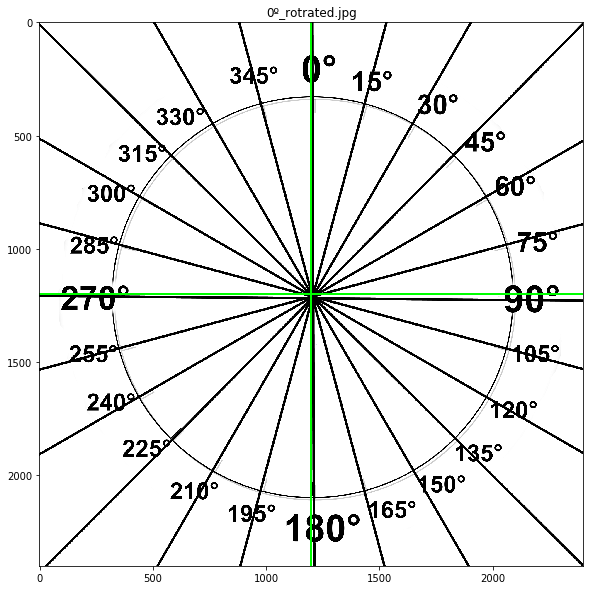

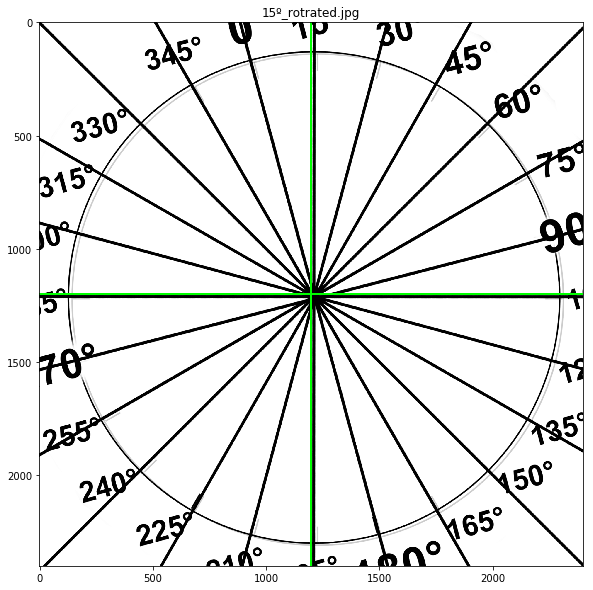

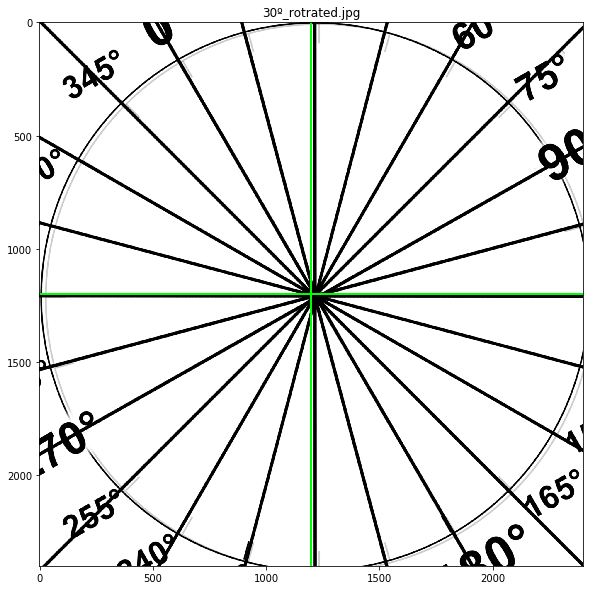

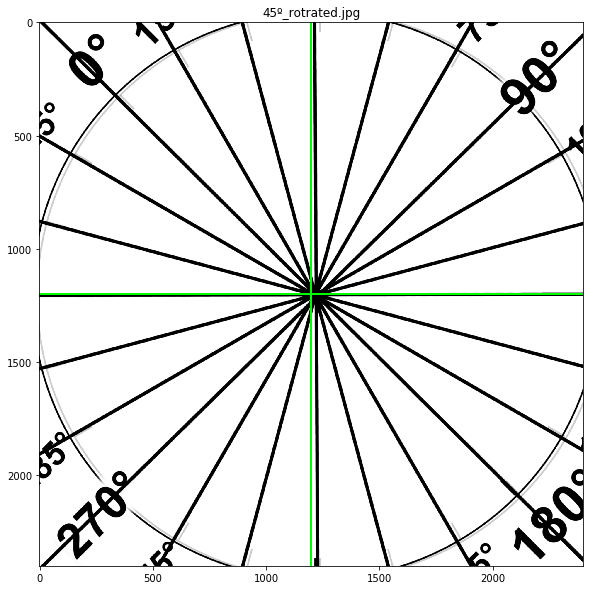

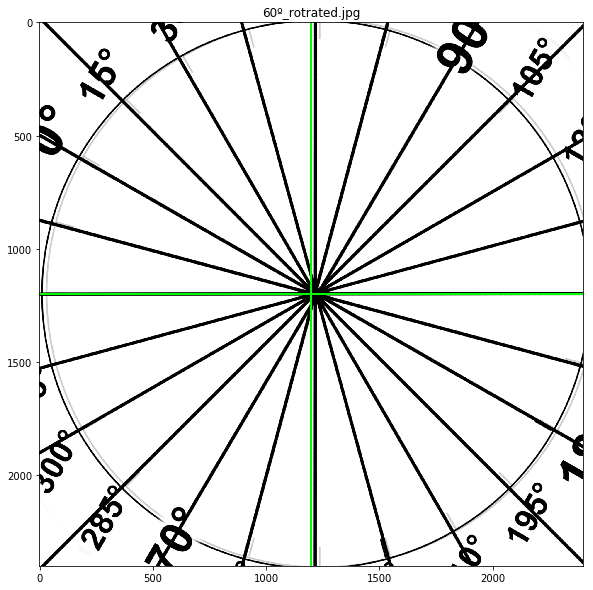

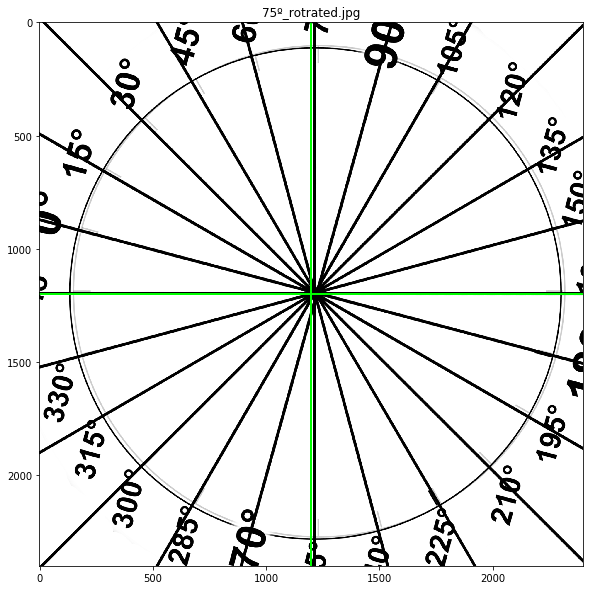

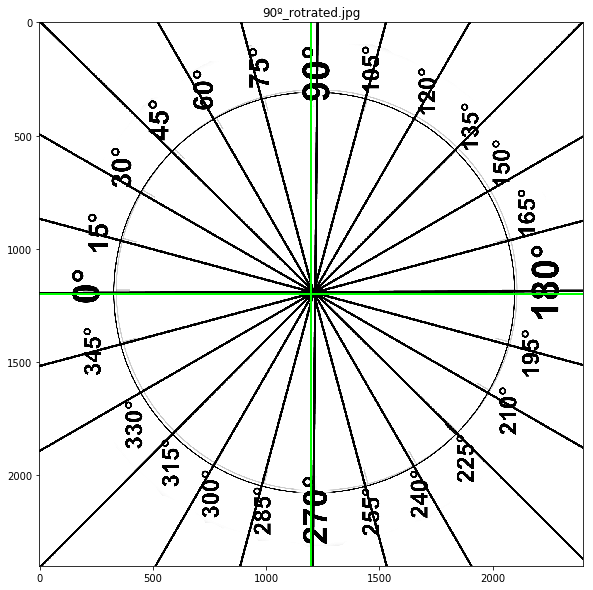

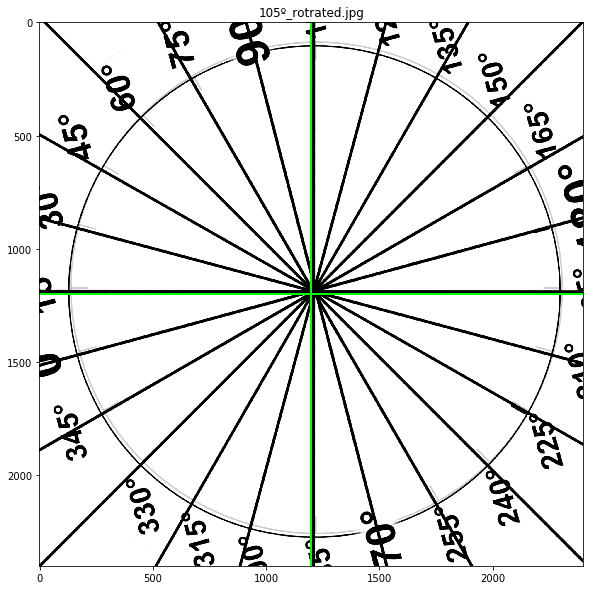

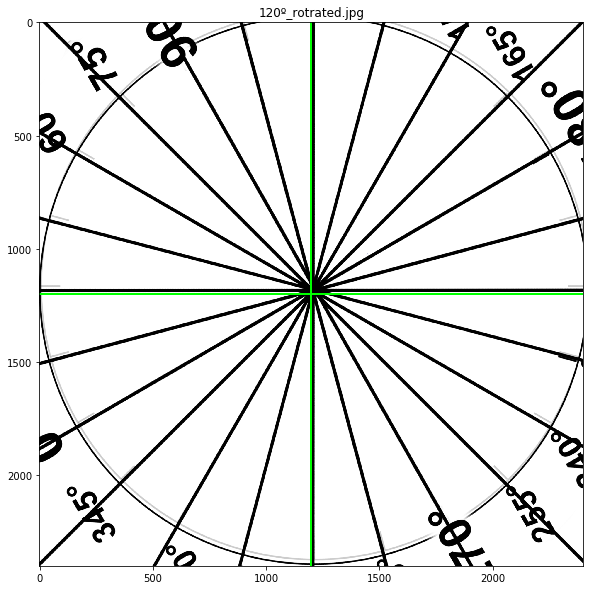

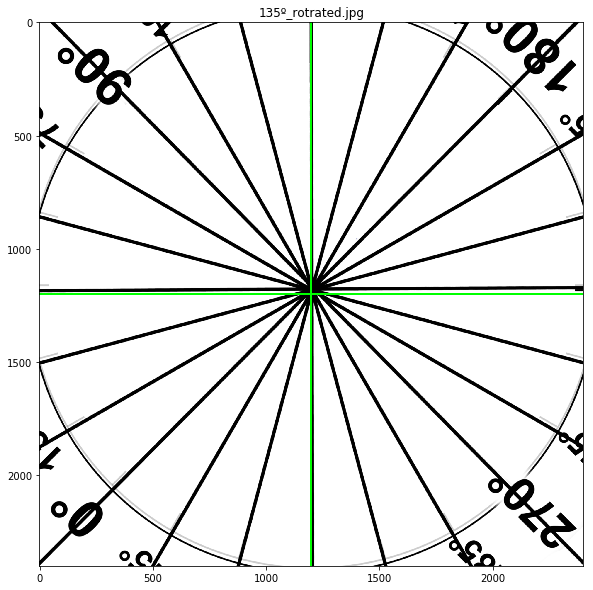

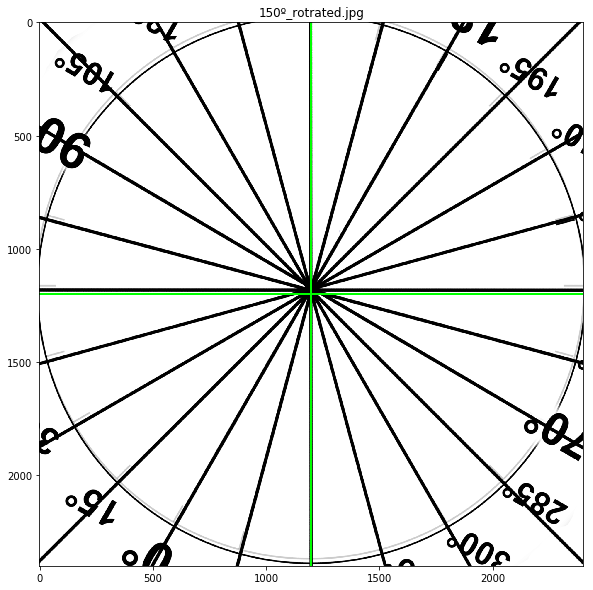

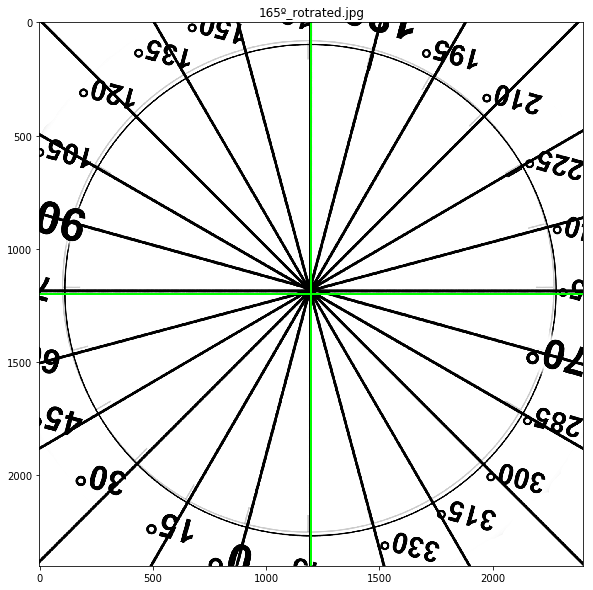

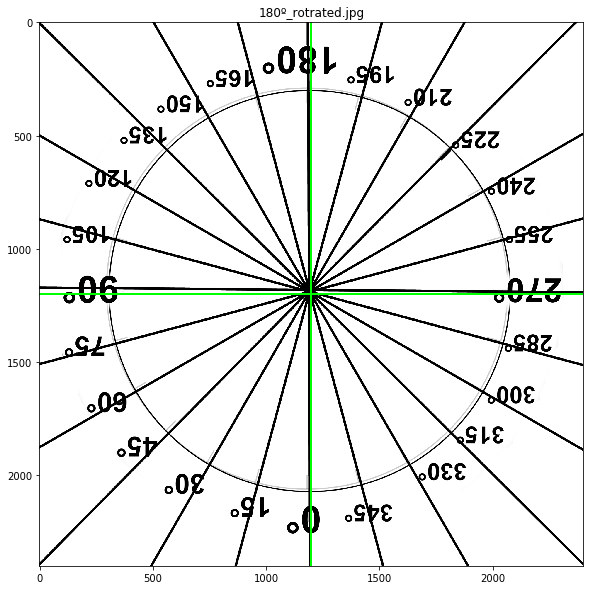

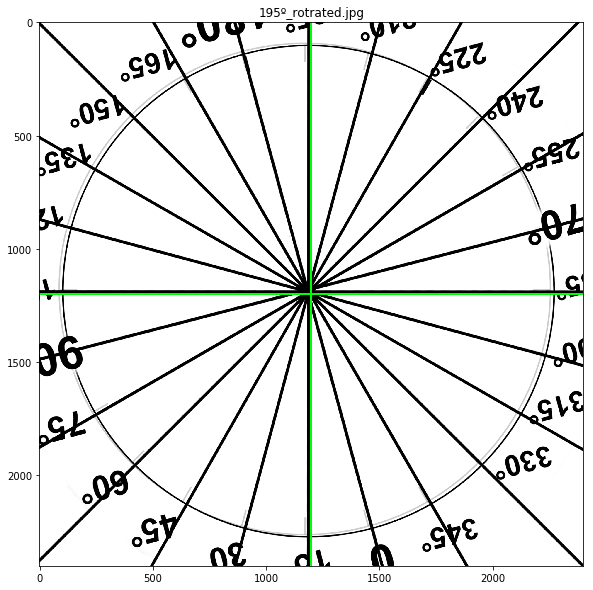

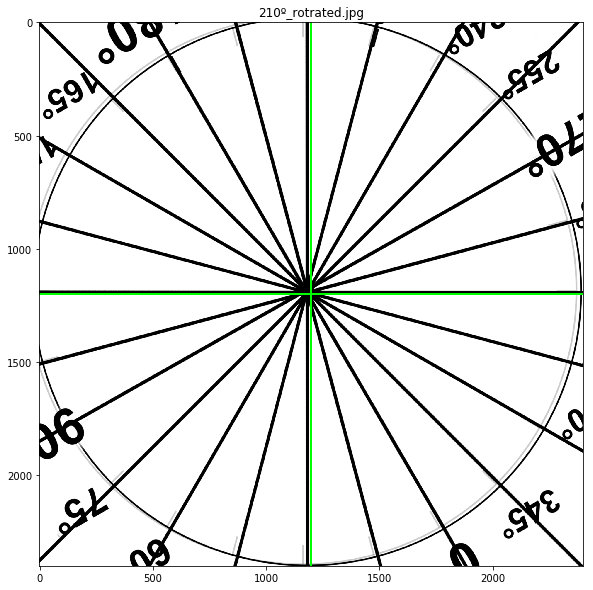

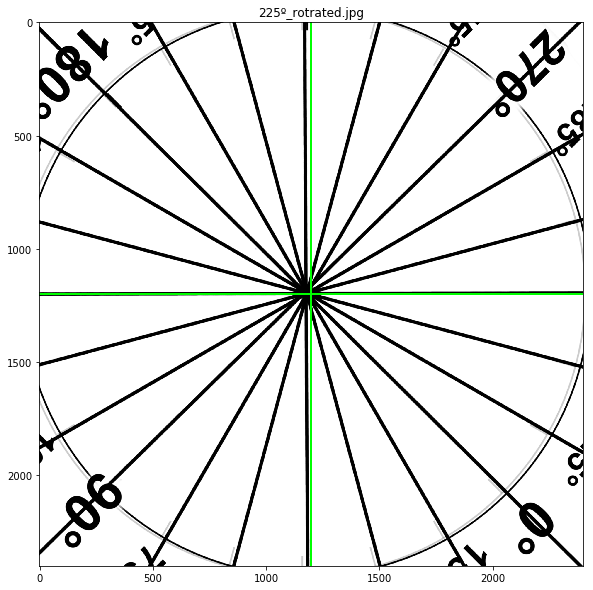

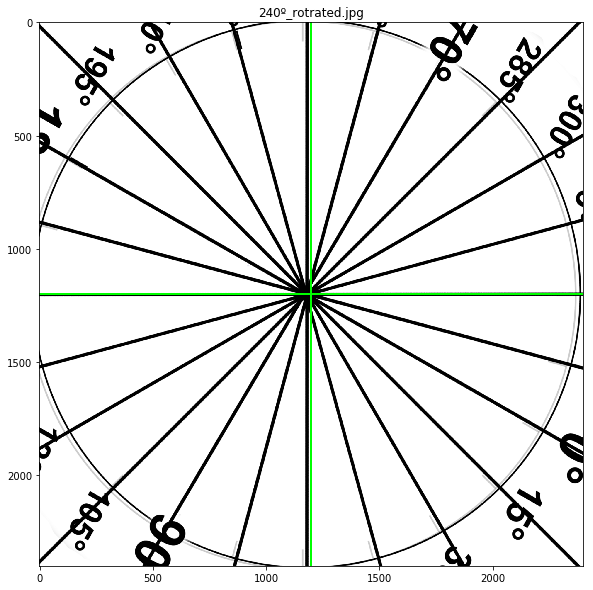

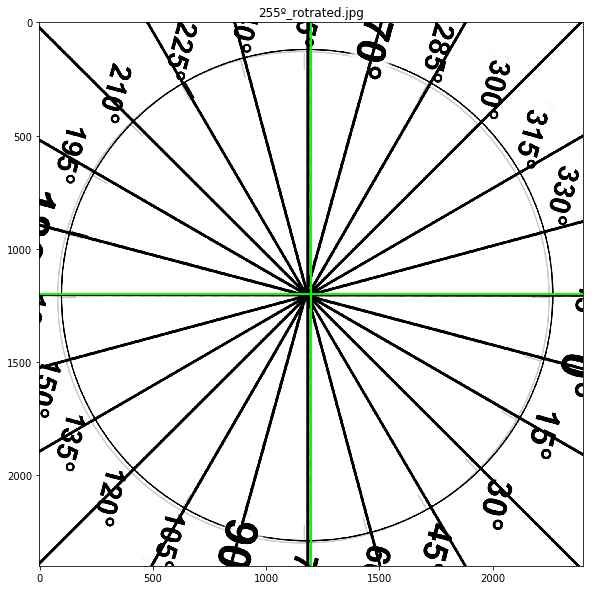

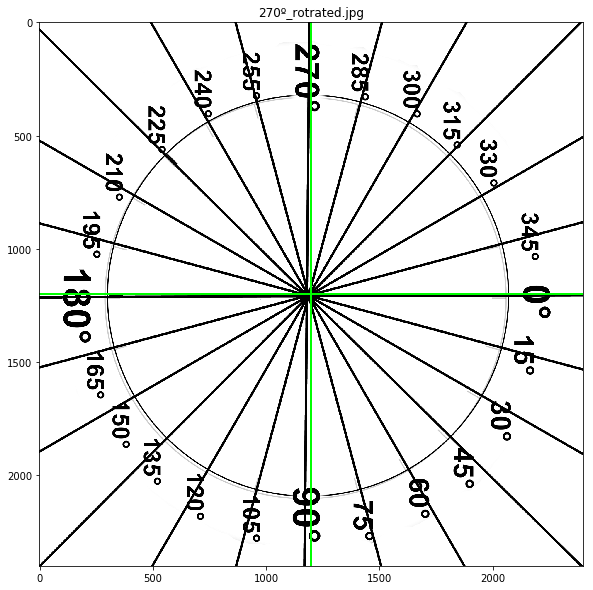

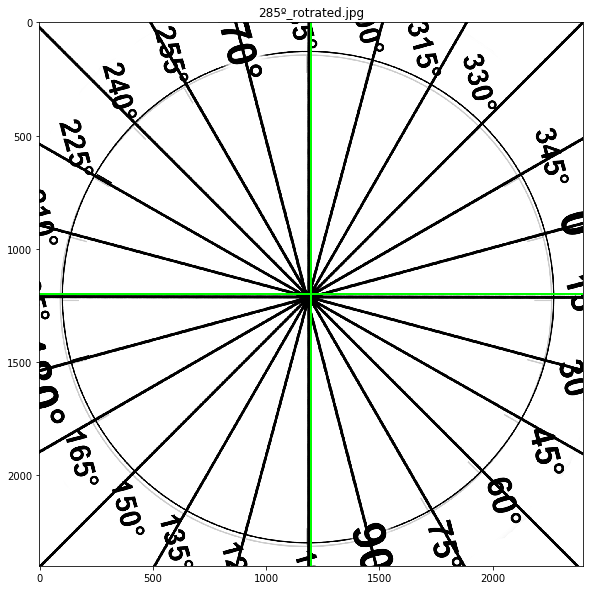

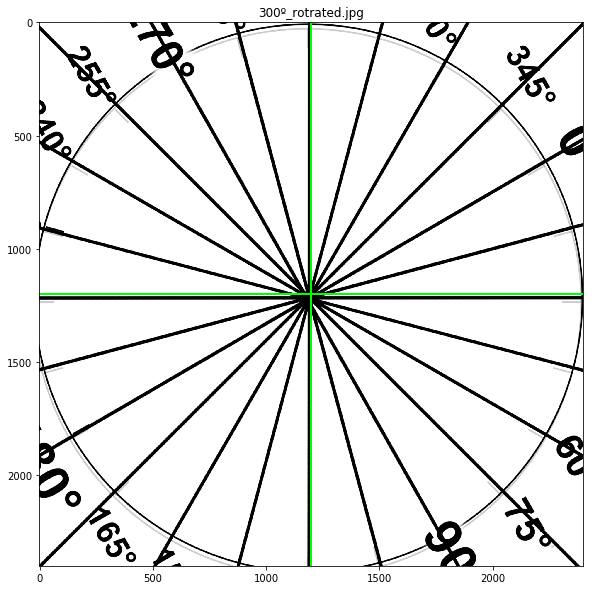

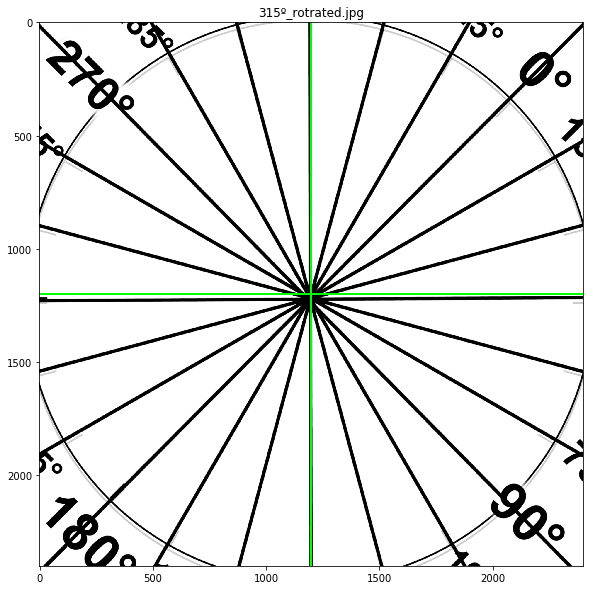

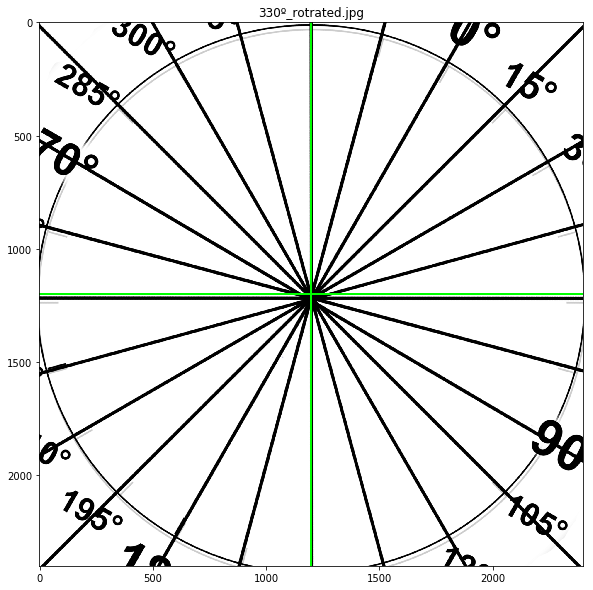

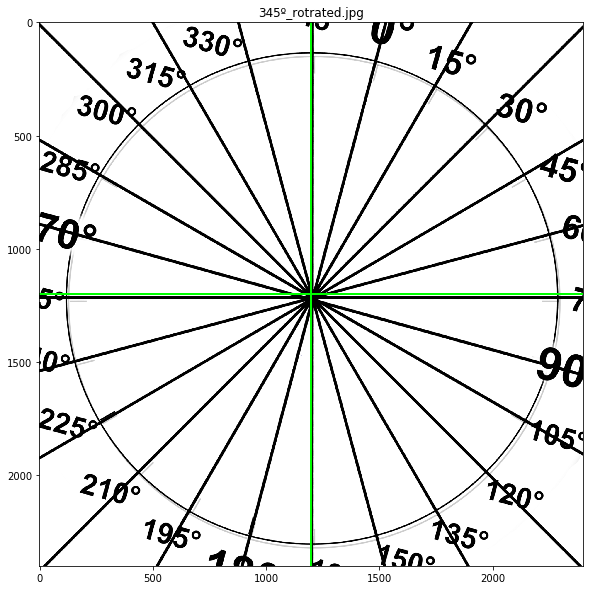

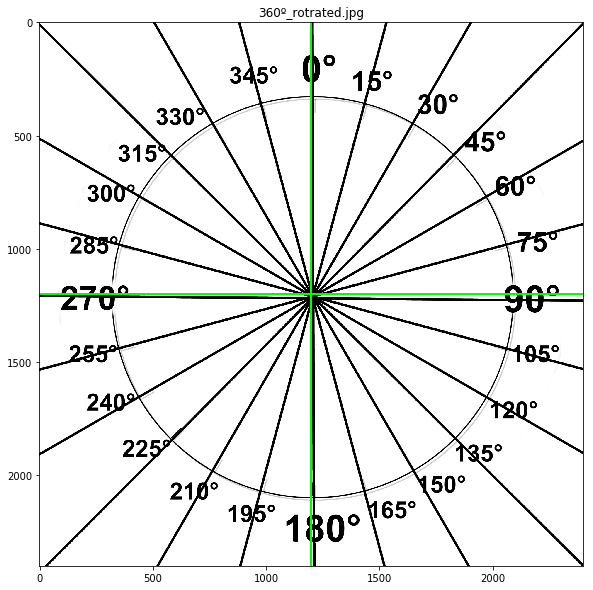

In [20]:
image = cv2.imread("compass_15.png")
lineThickness = 5
paso_grados = 15

for i in range(0,360+paso_grados,paso_grados):
    data = rotate_no_pad(image,angle = i)
    (h,w) = data.shape[0:2]
    cv2.line(data, (0, h//2), (w, h//2), (0,255,0), lineThickness) #horizontal
    cv2.line(data, (w//2, 0), (w//2, h), (0,255,0), lineThickness) #vertical
    #cv2.imwrite(os.path.join('temp_orig' , '%sº_rotrated.jpg'%i), data)
    plt.figure(figsize=(10,10))
    plt.imshow(data[:,:,::-1]),plt.title('%sº_rotrated.jpg'%i)


Dado que nuestro *testbench* ha sido desarrollado de manera funcional, llamando a la función *my_testbench()* con diferentes parámetros, podemos lograr funcionalidades diferentes, como mostramos a continuación primero con una senoidal:

Y ahora con una señal aleatoria, en este caso ruido blanco Gaussiano incorrelado de varianza $\sigma^2$:

In [21]:
# Usar CTRL+1 para comentar o descomentar el bloque de abajo.
sig_props = { 'tipo': 'ruido', 
              'varianza': (1, 1, 1) # Uso de tuplas para las frecuencias 
             } 
sig_props['descripcion'] = [ '$\sigma^2$ = ' + str(a_var) for a_var in sig_props['varianza'] ]
    
# Invocamos a nuestro testbench exclusivamente: 
my_testbench( sig_props )


NameError: name 'my_testbench' is not defined

Como puede verse en la figura anterior, al samplear una distribución estadística de media nula y varianza $\sigma^2=1$, obtenemos realizaciones cuyo parámetro $\sigma^2$ estimado, es decir $\hat\sigma^2$, tienen una desviación respecto al verdadero valor (sesgo). Nos ocuparemos de estudiar el sesgo y la varianza de algunos estimadores cuando veamos **Estimación Espectral**.

# Una vez terminado ...
Una vez que hayas termiando con la confección del documento, podemos utilizar una ventaja muy importante de este tipo de documentos que es la posibilidad de compartirlos *online* mediante la [página de nbviewer](http://nbviewer.jupyter.org/). Para ello es necesario que tu notebook y todos los recursos asociados estén alojados en un repositorio de [Github](https://github.com/). Como ejemplo, podés ver este mismo documento disponible [online](http://nbviewer.jupyter.org/github/marianux/pdstestbench/blob/master/notebook0.ipynb).